# Cryptocurrency Forecasting

## Problem Description

There are many cryptocurrency traders and businesses that deal in and use cryptocurrency, such as banks. For instance, some banks employ cryptocurrency to facilitate speedy transactions, "but because of its volatile pricing and the innovative blockchain technology it uses, they have trouble forecasting and assessing the cryptocurrency [1]". It is much more difficult to predict the cryptocurrency because it is easily impacted by news about purchases, social media trends, and other cryptocurrencies. Building trustworthy prediction models for cryptocurrency prices is crucial because they offer traders, investors, and banks useful information for successfully navigating the world of digital assets.

## Dataset Description

"The analysis was performed using Cryptocurrency Historical Data from Kaggle by sudalairajkumar [2]". The dataset provided contains historical information about the performance of various cryptocurrencies, including 37,082 entries with 10 columns. Each record includes details such as a serial number (SNo) for each entry of each coin, the name of the cryptocurrency (e.g., Stellar), its symbol (e.g., XLM), and the date and time of the observation in the format YYYY-MM-DD HH:MM:SS. Price-related fields include the highest price (High), lowest price (Low), opening price (Open), and closing price (Close) for the given day. Additionally, it records the trading volume (Volume) and the total market capitalization (Marketcap) for the cryptocurrency on that day. This dataset can help with cryptocurrency price prediction applications.

## Dataset Overview: including the number of samples, features, etc.

###getting the dataset from Kaggle

In [1]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Download latest version
path = kagglehub.dataset_download("sudalairajkumar/cryptocurrencypricehistory")
print("Path to dataset files:", path)

# List all files in the dataset directory
files = os.listdir(path)
print("Files in dataset:", files)

# Initialize an empty list to store DataFrames
dataframes = []

# Read each file and append to the list
for file_to_load in files:
    file_path = os.path.join(path, file_to_load)
    if file_path.endswith('.csv'):  # Ensure we're only processing CSV files
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all DataFrames into one
df = pd.concat(dataframes, ignore_index=True)


100%|██████████| 1.70M/1.70M [00:00<00:00, 49.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sudalairajkumar/cryptocurrencypricehistory/versions/3
Files in dataset: ['coin_USDCoin.csv', 'coin_Aave.csv', 'coin_XRP.csv', 'coin_Solana.csv', 'coin_Uniswap.csv', 'coin_Litecoin.csv', 'coin_Cosmos.csv', 'coin_EOS.csv', 'coin_Dogecoin.csv', 'coin_WrappedBitcoin.csv', 'coin_Ethereum.csv', 'coin_Tron.csv', 'coin_Bitcoin.csv', 'coin_Stellar.csv', 'coin_Monero.csv', 'coin_NEM.csv', 'coin_Polkadot.csv', 'coin_Tether.csv', 'coin_Iota.csv', 'coin_Cardano.csv', 'coin_CryptocomCoin.csv', 'coin_BinanceCoin.csv', 'coin_ChainLink.csv']


###Reading the file and showing the first 5 elements

In [2]:
# Display the first 5 rows of the DataFrame to get an overview of the data
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,USD Coin,USDC,2018-10-09 23:59:59,1.00833,1.00003,1.00427,1.00686,108803.0,0.0
1,2,USD Coin,USDC,2018-10-10 23:59:59,1.01908,1.00397,1.00494,1.00962,711783.0,0.0
2,3,USD Coin,USDC,2018-10-11 23:59:59,1.03123,1.00173,1.00994,1.00978,4177290.0,0.0
3,4,USD Coin,USDC,2018-10-12 23:59:59,1.01871,1.00114,1.00861,1.01272,1322240.0,0.0
4,5,USD Coin,USDC,2018-10-13 23:59:59,1.02029,1.00355,1.01445,1.00743,698507.0,0.0


###showing the size and all the data in the dataset

In [3]:
# Displaying the whole dataframe
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,USD Coin,USDC,2018-10-09 23:59:59,1.008330,1.000030,1.004270,1.006860,1.088030e+05,0.000000e+00
1,2,USD Coin,USDC,2018-10-10 23:59:59,1.019080,1.003970,1.004940,1.009620,7.117830e+05,0.000000e+00
2,3,USD Coin,USDC,2018-10-11 23:59:59,1.031230,1.001730,1.009940,1.009780,4.177290e+06,0.000000e+00
3,4,USD Coin,USDC,2018-10-12 23:59:59,1.018710,1.001140,1.008610,1.012720,1.322240e+06,0.000000e+00
4,5,USD Coin,USDC,2018-10-13 23:59:59,1.020290,1.003550,1.014450,1.007430,6.985070e+05,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
37077,1381,Chainlink,LINK,2021-07-02 23:59:59,18.520256,17.305501,18.220669,18.283561,6.865419e+08,7.990091e+09
37078,1382,Chainlink,LINK,2021-07-03 23:59:59,18.886003,17.898075,18.285458,18.538818,5.090763e+08,8.101641e+09
37079,1383,Chainlink,LINK,2021-07-04 23:59:59,19.894503,18.028957,18.548805,19.262838,6.802681e+08,8.418044e+09
37080,1384,Chainlink,LINK,2021-07-05 23:59:59,19.246891,17.814752,19.246891,18.371589,6.986191e+08,8.028560e+09


##Data Cleaning

###Removing unnecessary columns like (SNo, High, Low and Open) and fixing the date by making it datetime without hours

In [4]:
# Select specific columns from the DataFrame for analysis
df = df[['Name','Symbol','Date','Close','Volume','Marketcap']]

# Convert 'Date' column to datetime and retain only the date part
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()

# Display the updated DataFrame
df

<ipython-input-4-d059eb36cf63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date']).dt.normalize()


,Name,Symbol,Date,Close,Volume,Marketcap
0,USD Coin,USDC,2018-10-09,1.006860,1.088030e+05,0.000000e+00
1,USD Coin,USDC,2018-10-10,1.009620,7.117830e+05,0.000000e+00
2,USD Coin,USDC,2018-10-11,1.009780,4.177290e+06,0.000000e+00
3,USD Coin,USDC,2018-10-12,1.012720,1.322240e+06,0.000000e+00
4,USD Coin,USDC,2018-10-13,1.007430,6.985070e+05,0.000000e+00
...,...,...,...,...,...,...
37077,Chainlink,LINK,2021-07-02,18.283561,6.865419e+08,7.990091e+09
37078,Chainlink,LINK,2021-07-03,18.538818,5.090763e+08,8.101641e+09
37079,Chainlink,LINK,2021-07-04,19.262838,6.802681e+08,8.418044e+09
37080,Chainlink,LINK,2021-07-05,18.371589,6.986191e+08,8.028560e+09


###Making sure the data types are correct

In [5]:
# Summary of the Data Frame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37082 entries, 0 to 37081
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       37082 non-null  object        
 1   Symbol     37082 non-null  object        
 2   Date       37082 non-null  datetime64[ns]
 3   Close      37082 non-null  float64       
 4   Volume     37082 non-null  float64       
 5   Marketcap  37082 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.7+ MB


###Check for messing data

In [6]:
# Check for missing values in the dataset
# Calculate the total number of missing values for each column in the DataFrame
missing_counts = df.isnull().sum()

# Print a summary of missing values for all columns
print("Missing values in each column:")
missing_counts

Missing values in each column:


,0
Name,0
Symbol,0
Date,0
Close,0
Volume,0
Marketcap,0


###Picking top 5 coins to Analyze them

In [7]:
# Filter the DataFrame to include only rows where the 'Name' column matches one of the specified cryptocurrency names
top5 = df[(df['Name'] == 'Bitcoin') | # Include rows where the name is 'Bitcoin'
          (df['Name'] == 'XRP') |
          (df['Name'] == 'Litecoin') |
          (df['Name'] == 'Monero') |
          (df['Name'] == 'Dogecoin')]

# Display the filtered DataFrame containing data for the top five cryptocurrencies
top5 = top5.reset_index(drop=True)

top5

,Name,Symbol,Date,Close,Volume,Marketcap
0,XRP,XRP,2013-08-05,0.005613,0.000000e+00,4.387916e+07
1,XRP,XRP,2013-08-06,0.004680,0.000000e+00,3.659101e+07
2,XRP,XRP,2013-08-07,0.004417,0.000000e+00,3.453412e+07
3,XRP,XRP,2013-08-08,0.004254,0.000000e+00,3.325863e+07
4,XRP,XRP,2013-08-09,0.004291,0.000000e+00,3.354750e+07
...,...,...,...,...,...,...
14232,Monero,XMR,2021-07-02,211.345143,1.519434e+08,3.792466e+09
14233,Monero,XMR,2021-07-03,214.752778,1.364141e+08,3.853768e+09
14234,Monero,XMR,2021-07-04,219.841418,1.697858e+08,3.945232e+09
14235,Monero,XMR,2021-07-05,214.464993,1.709852e+08,3.848898e+09


##Dataset Exploration

### The crypto currencies that we are working with and their observation distribution

Number of cryptocurrencies: 5


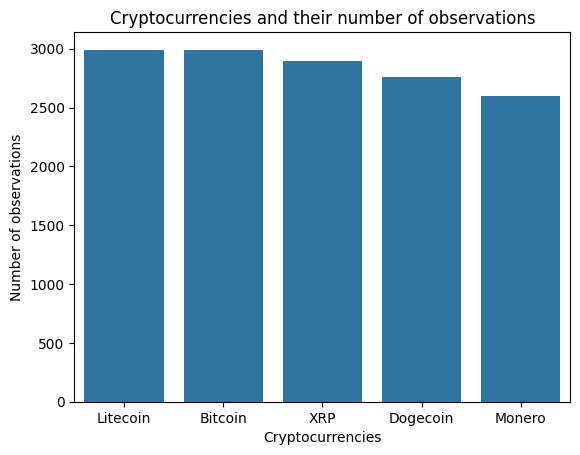

Name
Litecoin    2991
Bitcoin     2991
XRP         2893
Dogecoin    2760
Monero      2602


In [8]:
# Calculate the number of unique cryptocurrency names in the filtered DataFrame
number_of_cryptocurrencies = top5['Name'].nunique()
print(f"Number of cryptocurrencies: {number_of_cryptocurrencies}")

# Create a count plot to visualize the number of observations for each cryptocurrency
sns.countplot(x = 'Name', data = top5, order=top5['Name'].value_counts().index)

# Add a title and labels to the plot for better readability
plt.title('Cryptocurrencies and their number of observations')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Number of observations')

# Display the plot
plt.show()

# Calculate the count of observations for each cryptocurrency and store it in a variable
number_of_cryptocurrencies = top5['Name'].value_counts()
print(number_of_cryptocurrencies.to_string())

###Statistical Overview of the cryptocurrencies: Mean, Range, Min, and Max

In [9]:
# Calculate the mean of 'Close', 'Volume', and 'Marketcap' for each cryptocurrency
mean = top5[['Name','Close','Volume','Marketcap']].groupby('Name').mean()

# Calculate the range (max - min) for 'Close', 'Volume', and 'Marketcap' for each cryptocurrency
range = top5[['Name','Close','Volume','Marketcap']].groupby('Name').max() - top5[['Name','Close','Volume','Marketcap']].groupby('Name').min()

# Calculate the minimum values of 'Close', 'Volume', and 'Marketcap' for each cryptocurrency
min = top5[['Name','Close','Volume','Marketcap']].groupby('Name').min()

# Calculate the maximum values of 'Close', 'Volume', and 'Marketcap' for each cryptocurrency
max = top5[['Name','Close','Volume','Marketcap']].groupby('Name').max()

# Print the calculated mean, range, min and max values
print("Mean:")
print(mean)

print("\nRange:")
print(range)

print("\nMin:")
print(min)

print("\nMax:")
print(max)

Mean:
                Close        Volume     Marketcap
Name                                             
Bitcoin   6711.290443  1.090633e+10  1.208761e+11
Dogecoin     0.013763  4.326321e+08  1.760533e+09
Litecoin    49.279008  1.284851e+09  2.934139e+09
Monero      74.134773  1.637467e+08  1.236534e+09
XRP          0.234790  1.260299e+09  9.678507e+09

Range:
                 Close        Volume     Marketcap
Name                                              
Bitcoin   63435.026930  3.509679e+11  1.185586e+12
Dogecoin      0.684690  6.941068e+10  8.867932e+10
Litecoin    385.293769  1.799426e+10  2.575863e+10
Monero      483.360090  2.895911e+10  8.657689e+09
XRP           3.375000  3.695518e+10  1.308315e+11

Min:
              Close       Volume     Marketcap
Name                                          
Bitcoin   68.431000     0.000000  7.784112e+08
Dogecoin   0.000087     0.000000  1.509085e+06
Litecoin   1.157010     0.000000  3.789242e+07
Monero     0.223522  7899.569824  1.27

###The Market cap for each coin

<ipython-input-10-669d81d28e80>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top5['Name'], x=Marketcap_B, palette='rocket', order=top5['Name'].value_counts().index)


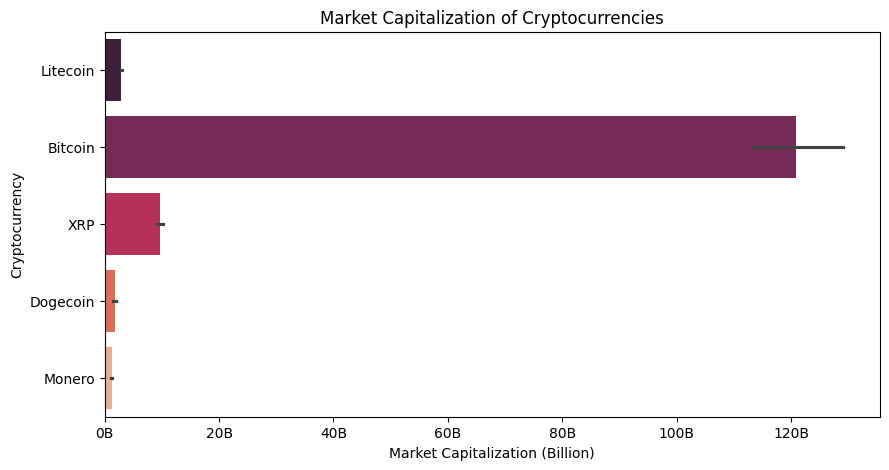

In [10]:
import matplotlib.ticker as ticker

Marketcap_B = top5['Marketcap'] / 1e9  # Convert to billions

plt.figure(figsize=(10, 5))
ax = sns.barplot(y=top5['Name'], x=Marketcap_B, palette='rocket', order=top5['Name'].value_counts().index)

plt.title("Market Capitalization of Cryptocurrencies")
# Format x-axis labels in billions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}B'))
plt.xlabel("Market Capitalization (Billion)")
plt.ylabel("Cryptocurrency")

plt.show()


###Cryptocurrencies prices over time

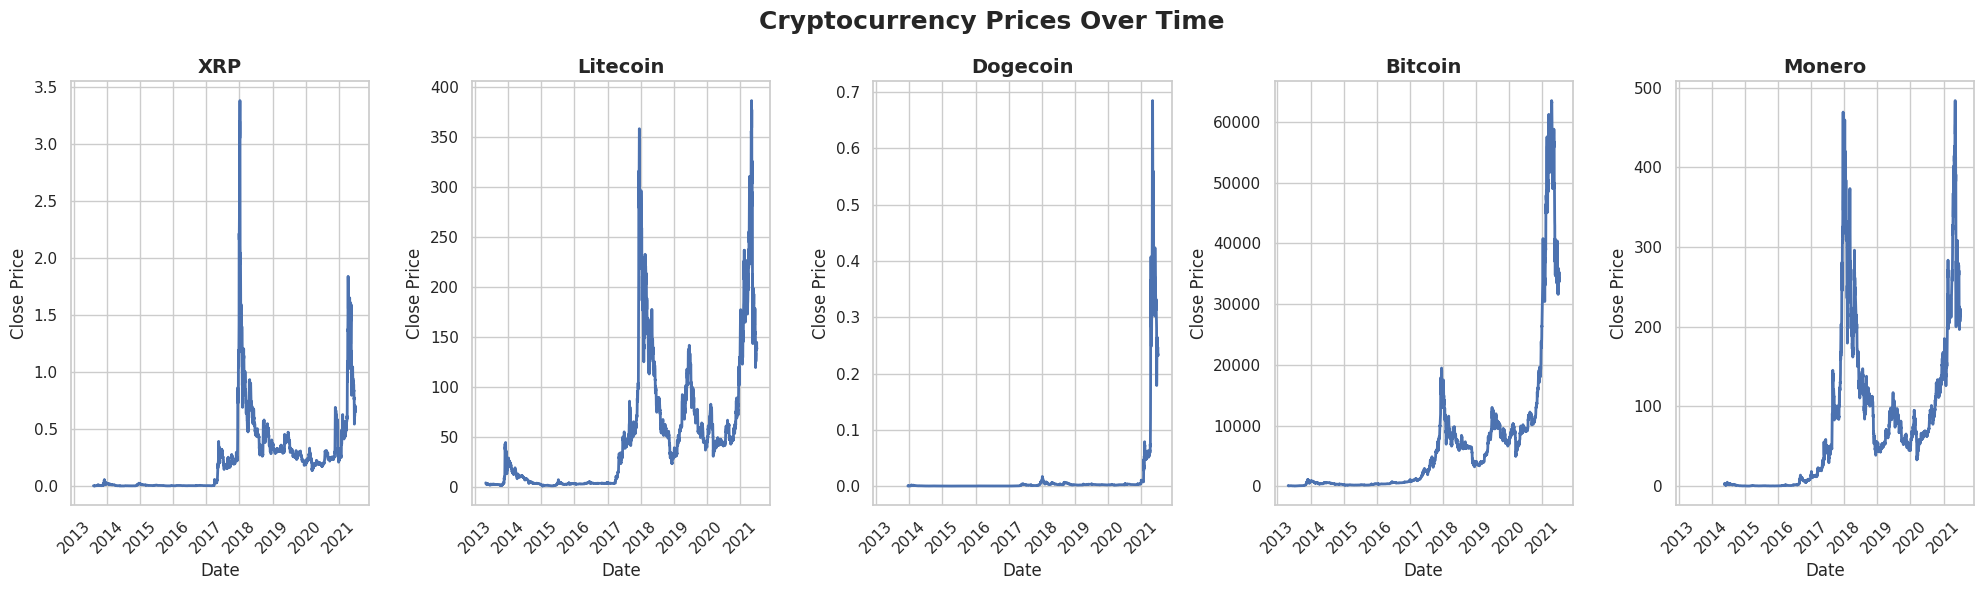

In [12]:
import matplotlib.dates as mdates

# Set a better style for graphs
sns.set(style="whitegrid")

# Get unique cryptocurrencies
coins = top5['Name'].unique()
num_coins = len(coins)

# Create subplots (one row, multiple columns)
fig, axes = plt.subplots(1, num_coins, figsize=(20, 6), sharex=True)

# If there's only one coin, wrap axes in a list for consistency
if num_coins == 1:
    axes = [axes]

# Loop through each coin and plot price over time
for i, coin in enumerate(coins):
    ax = axes[i]  # Select subplot for this coin
    coin_data = top5[top5['Name'] == coin].copy()  # Filter data for this coin

    # Ensure 'Date' is in datetime format
    coin_data['Date'] = pd.to_datetime(coin_data['Date'])
    coin_data.set_index('Date', inplace=True)  # Set 'Date' as the index

    # Plot the 'Close' price over time
    ax.plot(coin_data.index, coin_data['Close'], label=coin, color='b', lw=2)

    # Title and labels for each subplot
    ax.set_title(coin, fontsize=14, fontweight="bold")
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Close Price", fontsize=12)

    # Set x-axis to show only the years
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks at each year
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as year only
    ax.tick_params(axis='x', rotation=45)  # Rotate x labels for better visibility

# Overall title for the whole figure
plt.suptitle("Cryptocurrency Prices Over Time", fontsize=18, fontweight="bold")
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


###The volatility of cryptocurrencies

<ipython-input-13-e7107b651c65>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volatility, x="Name", y="Volatility", palette="viridis")


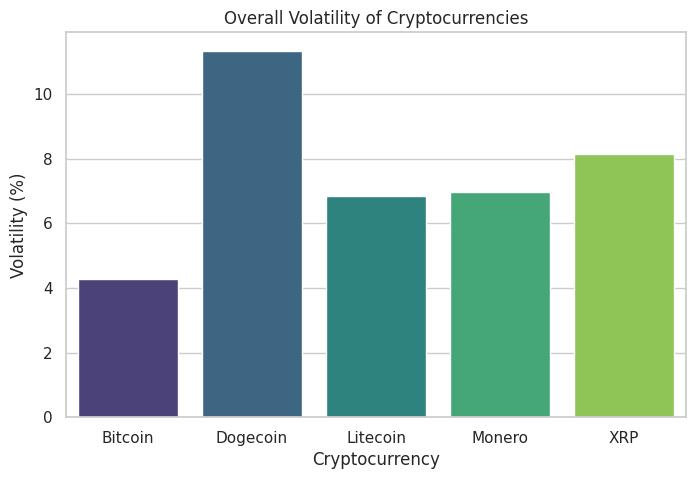

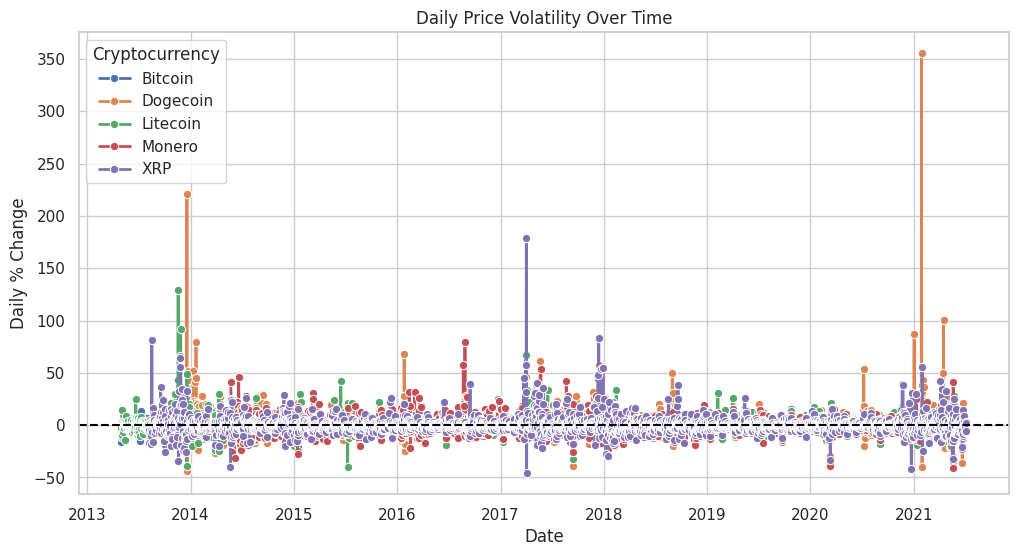

In [13]:
# Sort data by Name and Date
df = top5.sort_values(by=["Name", "Date"])

# Compute daily percentage change in closing price
df["Daily_Change"] = df.groupby("Name")["Close"].pct_change() * 100

# Calculate volatility (standard deviation of daily percentage change)
volatility = df.groupby("Name")["Daily_Change"].std().reset_index()
volatility.columns = ["Name", "Volatility"]

plt.figure(figsize=(8, 5))
sns.barplot(data=volatility, x="Name", y="Volatility", palette="viridis")
plt.xlabel("Cryptocurrency")
plt.ylabel("Volatility (%)")
plt.title("Overall Volatility of Cryptocurrencies")
plt.show()

# --- 2. Line plot for daily changes over time ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Daily_Change", hue="Name", marker="o", linewidth=2)
plt.axhline(0, color="black", linestyle="--")  # Reference line
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.title("Daily Price Volatility Over Time")
plt.legend(title="Cryptocurrency")
plt.grid(True)
plt.show()

##Correlations

###Finding the correlation between the features(Close, Volume, Marketcap)

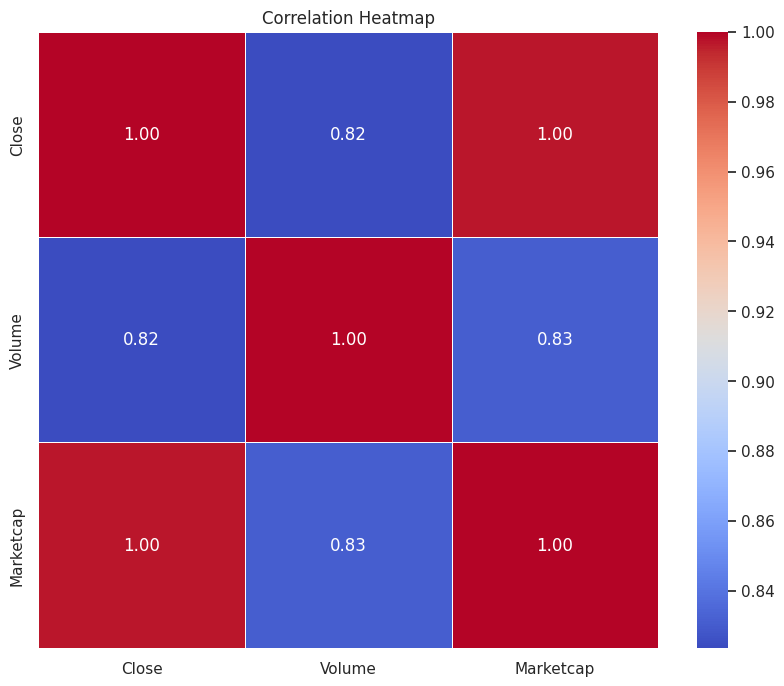

In [14]:
cdf = top5.drop(columns=['Name', 'Symbol','Date'])
corr_matrix = cdf.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

###Market cap vs Closing Price

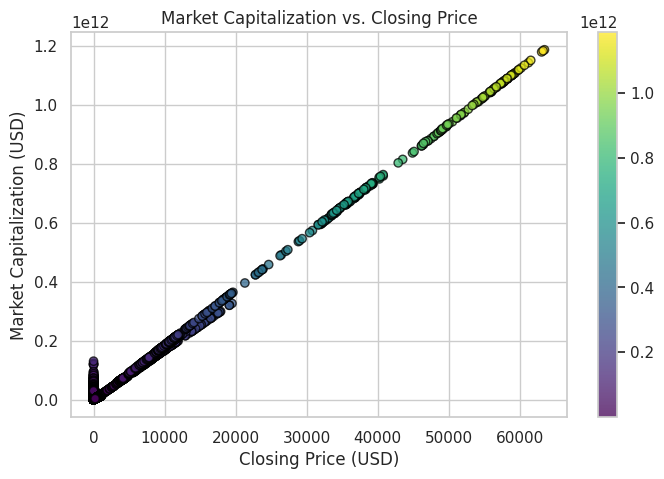

In [15]:
# Extract relevant columns from the DataFrame
closing_prices = top5["Close"]
market_caps = top5["Marketcap"]

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(closing_prices, market_caps, c=market_caps, cmap="viridis", alpha=0.75, edgecolors="black")
cbar = plt.colorbar()
#cbar.set_label("Market Capitalization (USD)")

# Labels and title
plt.xlabel("Closing Price (USD)")
plt.ylabel("Market Capitalization (USD)")
plt.title("Market Capitalization vs. Closing Price")
plt.grid(True)

# Show plot
plt.show()

# Reference list:

[1] R. K. Rathore, D. Mishra, P. S. Mehra, O. Pal, A. S. Hashim, A. Shapi'i, T. Ciano, and M. Shutaywi, "Real-world model for bitcoin price prediction," Information Processing & Management, vol. 59, no. 4, 2022, Art. no. 102968. DOI: 10.1016/j.ipm.2022.102968. [Online]. Available: https://www.sciencedirect.com/science/article/pii/S030645732200084X.

[2] The Cryptocurrency Historical Dataset: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory